In [114]:
%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 8, 6 

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

In [115]:
g = np.array([0.02,0.04]) #shear inputs
dg = np.array([0.000045024,0.00013203]) #g_measured - g_true
ddg = np.array([9.0578e-6,2.1079e-5]) #uncertainty on dg

In [116]:
def f(p,x):
    #dg/g = m + a*g^2
    return p[0] + p[1]*x**2.

In [117]:
def diff(params):
    return dg/g - f(params,g)

In [118]:
def m(g,dg):
    #least squares fit
    return (sum(dg/g)-sum(g*dg)*sum(g**2.)/sum(g**4.))*sum(g**4.)/(len(g)*sum(g**4.)-sum(g**2.)**2.)

In [119]:
def dm(g,ddg):
    #uncertainty on fit m
    a = sum(g**4.)/(len(g)*sum(g**4.)-(sum(g**2.)**2.))
    b = np.sqrt( sum(((1/g-g*sum(g**2.)/sum(g**4.)) * ddg)**2.) )
    return a*b

In [120]:
lp = leastsq(diff,[1.0,1.0])

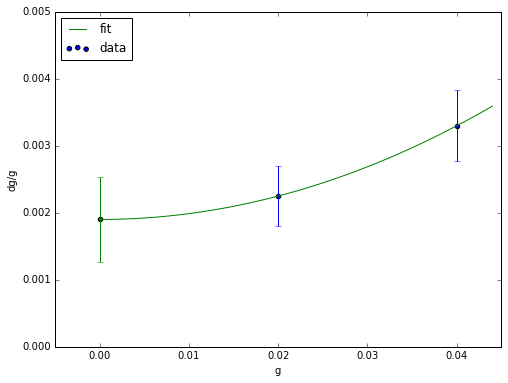

In [121]:
x = np.arange(0.,0.045,0.001)
fitptx = np.array([0])
fitpty = np.array([m(g,dg)])
fiterror = np.array([dm(g,ddg)])

plt.scatter(g,dg/g,label='data')
plt.errorbar(g,dg/g,ddg/g, linestyle='None')
plt.plot(x,f(lp[0],x),label='fit',c='g')
plt.scatter([0],[m(g,dg)],c='g')
plt.errorbar(fitptx,fitpty,fiterror,c='g')
plt.xlim(-0.005,0.045)
plt.ylim(0.,0.005)
plt.legend(loc='upper left')
plt.xlabel('g')
plt.ylabel('dg/g')

In [122]:
print 'm = ',m(g,dg), ' +/- ', dm(g,ddg)

m =  0.00190135  +/-  0.000628883692146


In [123]:
def grange(gmax,n):
    return np.array([i*gmax/n for i in range(1,n+1)])

In [124]:
grange(0.04,1)

array([ 0.04])

In [125]:
def ug(N):
    return 0.000357/np.sqrt(N)

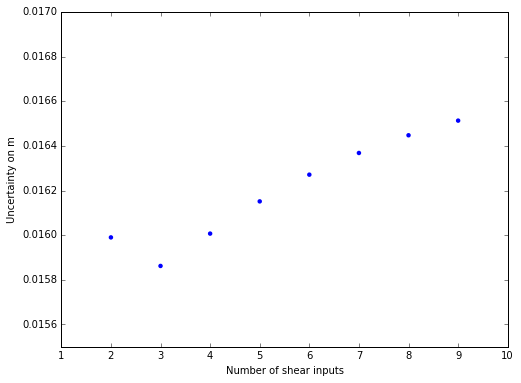

In [234]:
#Same uncertainty for each shear input
gmax = 0.06
for n in range(2,10):
    gr = grange(gmax,n)
    dmr = [dm(gr,0.000357)]
    plt.scatter([n]*len(dmr),dmr,edgecolor='none')
plt.xlabel('Number of shear inputs')
plt.ylabel('Uncertainty on m')
plt.ylim([0.0155,0.0170])
plt.show()

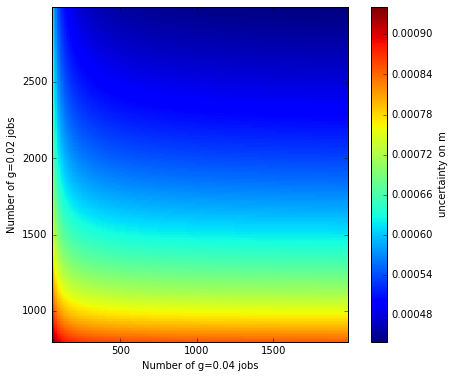

In [251]:
gw = np.array([0.02,0.04])
Nrange = [np.arange(800,3000,10),np.arange(50,2000,10)]#,np.arange(10,1000,10)]
w = np.array([[[Ni,Nj] for Nj in Nrange[1]] for Ni in Nrange[0]])
uw = np.array([[ug(i) for i in j] for j in w])
ddw = np.array([[dm(gw,ugi) for ugi in uwj] for uwj in uw])

plt.imshow(ddw,origin='lower',interpolation='nearest',
           extent=[Nrange04.min(),Nrange04.max(),Nrange02.min(),Nrange02.max()])
plt.xlabel('Number of g=0.04 jobs')
plt.ylabel('Number of g=0.02 jobs')
plt.colorbar(label='uncertainty on m')

In [247]:
mindm = 0.00045
jobs = w[np.where(ddw<=0.00045)][0]
print "Number of g=0.02 jobs for dm=0.00045: ", jobs[0]
print "Number of g=0.04 jobs for dm=0.00045: ", jobs[1]
print "Total number of jobs to run = ", sum(jobs)

Number of g=0.02 jobs for dm=0.00045:  2870
Number of g=0.04 jobs for dm=0.00045:  1730
Total number of jobs to run =  4600


In [ ]:
gw = np.array([0.02,0.04,0.06])
Nrange = [np.arange(800,1000,100),np.arange(50,200,100),np.arange(10,100,50)]

In [ ]:
w = np.array([[[[Ni,Nj,Nk] for Nk in Nrange[2]] for Nj in Nrange[1]] for Ni in Nrange[0]])

In [ ]:
#uw = np.array([[[ug(i) for k in i] for i in j] for j in w])
#ddw = np.array([[[dm(gw,ugi) for ugk in ugi] for ugi in uwj] for uwj in uw])

#plt.imshow(ddw,origin='lower',interpolation='nearest',
#           extent=[Nrange[2].min(),Nrange[2].max(),Nrange[1].min(),Nrange[1].max(),Nrange[0].min(),Nrange[0].max()])
#plt.xlabel('Number of g=0.04 jobs')
#plt.ylabel('Number of g=0.02 jobs')
#plt.colorbar(label='uncertainty on m')